In [5]:
%run ../nn_option_pricer/_key_imports.py
import sys

sys.path.append("../")
from nn_option_pricer.bs import make_GBM_dataset

In [24]:
SEED = 42
T = 1
N_TIMES = 1
N_SAMPLES = 2**16
param_space = {"log(S/K)": (np.exp(-1), np.exp(1)), "sigma": (0.2, 0.6)}


from pandas.util.testing import assert_frame_equal

assert_frame_equal(
    make_GBM_dataset(param_space, N_SAMPLES, N_TIMES, T, seed=42),
    make_GBM_dataset(param_space, N_SAMPLES, N_TIMES, T, seed=42),
)


start = time.time()
X_df = make_GBM_dataset(param_space, N_SAMPLES, N_TIMES, T, seed=42)
print("Dataset Generation Time", time.time() - start)
X_df.to_csv("datasets/bs_train.csv", index=False)

start = time.time()
X_df = make_GBM_dataset(param_space, N_SAMPLES, N_TIMES, T, seed=42)
print("Dataset Generation Time", time.time() - start)
X_df.to_csv("datasets/bs_test.csv", index=False)

param_space = {"log(S/K)": (np.exp(-1.5), np.exp(1.5)), "sigma": (0.1, 0.8)}

start = time.time()
X_df_test = make_GBM_dataset(param_space, N_SAMPLES, N_TIMES, T, seed=2022)
X_df_test.to_csv("datasets/bs_test_extrap.csv", index=False)
print("Dataset Generation Time", time.time() - start)


display(X_df)

(65536, 3) (65536,)
(65536, 3) (65536,)
(65536, 3) (65536,)
Dataset Generation Time 0.19899797439575195
(65536, 3) (65536,)
Dataset Generation Time 0.20212197303771973
(65536, 3) (65536,)
Dataset Generation Time 1.101426362991333


,log(S/K),ttm,sigma,pathwise_delta,call_payoff,true_call,digital_payoff,true_digital,true_call_d/dlog(S/K),true_call_d/dttm,true_call_d2/dlog(S/K)dlog(S/K),true_call_d2/dlog(S/K)dttm,true_call_d/dSK,true_call_d2/dSKdSK,path
0,0.547912,0.302303,0.302303,4.186277,1.046039,0.735090,1,0.951674,1.686764,0.100368,2.018776,-0.551573,0.975212,0.191954,0
1,-0.122243,0.532574,0.532574,0.000000,0.000000,0.145428,0,0.310011,0.455439,0.352799,1.117881,0.328451,0.514659,0.748578,1
2,0.717196,0.454447,0.454447,3.482349,0.866105,1.064295,1,0.911644,1.975939,0.160178,2.328407,-0.476166,0.964494,0.172046,2
3,0.394736,0.485531,0.485531,1.208609,0.099368,0.552275,1,0.715740,1.268015,0.339079,1.966383,-0.398232,0.854462,0.470600,3
4,-0.811645,0.342933,0.342933,0.000000,0.000000,0.000679,0,0.005571,0.006249,0.015918,0.052668,0.117822,0.014071,0.104517,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,-0.031826,0.289309,0.289309,0.000000,0.000000,0.098232,0,0.399493,0.497725,0.386214,1.832678,0.339960,0.513820,1.378122,65531
65532,0.977500,0.367363,0.367363,9.979323,2.159006,1.658515,1,0.993379,2.651894,0.018553,2.702397,-0.125104,0.997776,0.019002,65532
65533,-0.545877,0.498332,0.498332,0.000000,0.000000,0.025737,0,0.089381,0.115119,0.161560,0.439320,0.435913,0.198709,0.559611,65533
65534,0.169635,0.373917,0.373917,0.000000,0.000000,0.270606,0,0.605154,0.875760,0.385002,1.905407,-0.274619,0.739118,0.868994,65534


Text(0.5, 1.0, 'True payoffs vs Monyness')

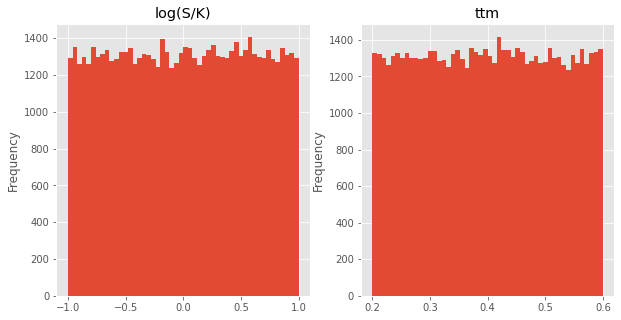

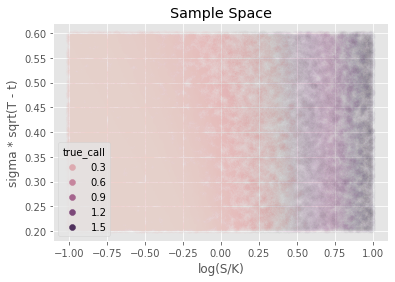

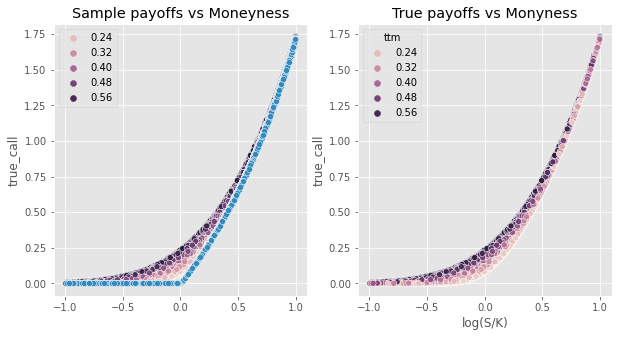

In [18]:
"""
Visualise data
"""
feat_names = ["log(S/K)", "ttm"]
Xs = X_df[feat_names].values
ys = X_df["true_call"]
f_to_i = lambda x: feat_names.index(x)

# Marginal Distributions of Parameter Space
fig, ax = plt.subplots(figsize=(5 * len(feat_names), 5), ncols=len(feat_names))
for i in range(len(feat_names)):
    X_df.iloc[:, i].plot(kind="hist", ax=ax[i], bins=50)
    ax[i].set_title(feat_names[i])
# Terminal Distribution of underlying
fig, ax = plt.subplots()
sns.scatterplot(x=Xs[:, f_to_i("log(S/K)")], y=Xs[:, f_to_i("ttm")], ax=ax, hue = X_df['true_call'], alpha = 0.01)
ax.set_title("Sample Space")
ax.set_xlabel("log(S/K)")
ax.set_ylabel("sigma * sqrt(T - t)")
# sample payoff, intrinsic val v S/K

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
intrinsic_val = np.maximum(np.exp(Xs[:, f_to_i("log(S/K)")]) - 1.0, 0)
sns.scatterplot(
    x =Xs[:, f_to_i("log(S/K)")], y=ys, hue=Xs[:, f_to_i("ttm")], ax=ax[0]
)
sns.scatterplot(x=Xs[:, f_to_i("log(S/K)")], y=intrinsic_val, ax=ax[0])
ax[0].set_title("Sample payoffs vs Moneyness")
sns.scatterplot(
    x=X_df["log(S/K)"], y=X_df["true_call"], hue=X_df["ttm"], ax=ax[1]
)
ax[1].set_title("True payoffs vs Monyness")

In [20]:
idx = X_df['log(S/K)'].sort_values().index

$$\frac{\partial g}{\partial m}  = e^{m}\frac{\partial g}{\partial S}$$

KeyboardInterrupt: 

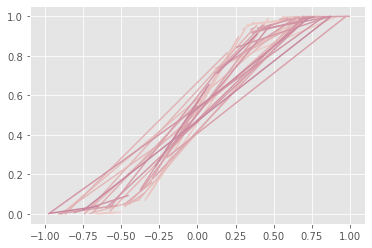

In [23]:
sns.lineplot(X_df.loc[idx,'log(S/K)'], X_df.loc[idx, 'true_call_d/dSK'], hue = X_df.loc[idx, 'ttm']);

In [ ]:
X_df.groupby(X_df['ttm'].round(2)).plot(x='log(S/K)', y = 'true_call_d2/dlog(S/K)dlog(S/K)')

<AxesSubplot:xlabel='log(S/K)', ylabel='true_call_d2/dSKdSK'>

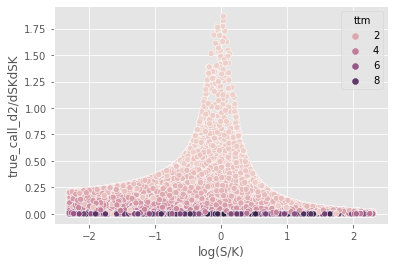

In [24]:
sns.scatterplot(X_df['log(S/K)'], X_df[f'true_call_d2/dSKdSK'], hue = X_df['ttm'])

In [84]:
from nn_option_pricer.bs import *

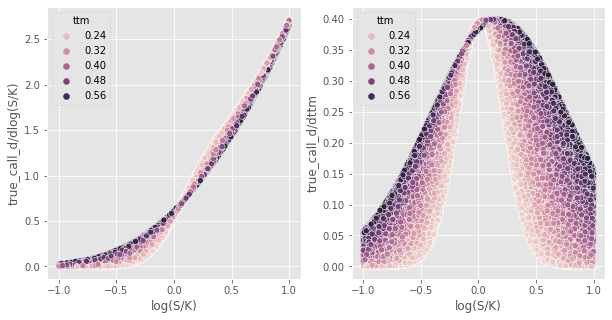

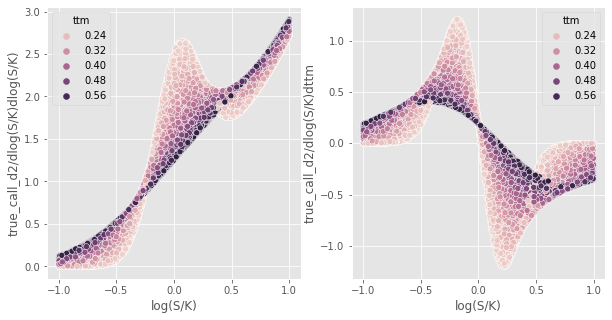

In [85]:
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
for i,x in enumerate(feat_names):
    sns.scatterplot(x = X_df['log(S/K)'], y = X_df[f'true_call_d/d{x}'], hue = X_df['ttm'], ax = ax[i])
    
fig, ax = plt.subplots(ncols = 2, figsize=(10, 5))
for i,x in enumerate(feat_names):
    sns.scatterplot(x = X_df['log(S/K)'], y = X_df[f'true_call_d2/dlog(S/K)d{x}'], hue = X_df['ttm'], ax = ax[i])

In [89]:
true_pde_err = bs_log_pde_err(
    X_df["log(S/K)"],
    X_df["ttm"],
    X_df["true_call_d/dttm"],
    X_df["true_call_d/dlog(S/K)"],
    X_df["true_call_d2/dlog(S/K)dlog(S/K)"],
)
assert np.allclose(np.mean(true_pde_err), 0, rtol =1e-6, atol=1e-5)

<AxesSubplot:xlabel='log(S/K)'>

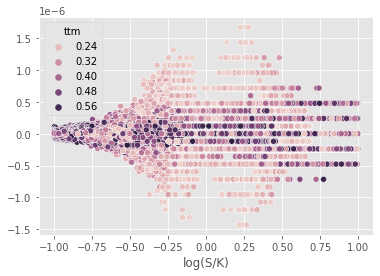

In [90]:
sns.scatterplot(X_df['log(S/K)'], true_pde_err, X_df['ttm'])